**Setup:**

importing files and starting spark session


In [ ]:
!pip install pyspark >& /dev/null
!pip install libsvm2csv

In [ ]:
# Create Spark Session and Spark Context
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('BDA-FinalProject-CommericalTVClassification').getOrCreate()
sc = spark.sparkContext

In [8]:
from libsvm2csv import convert

# Convert BBC txt file to csv
convert('data/BBC.txt','BBC.csv')

# Convert CNN txt file to csv
convert('data/CNN.txt','CNN.csv')

In [ ]:

# Read CSVs into DataFrames
val1 = spark.read.csv('CNN.csv', header=True, inferSchema=True)
val2 = spark.read.csv('BBC.csv', header=True, inferSchema=True)

# Show the DataFrame schema and a few rows
val1.printSchema()

# Show the DataFrame schema and a few rows
val2.printSchema()

In [ ]:
print('rows: ', val1.count(),
      ', cols:', len(val1.columns))
val1\
  .show(5)

In [17]:
from pyspark.sql.functions import when, col

# Replace -1 with 0 in the 'target' column
df = val1.withColumn('target', when(col('target') == -1, 0).otherwise(col('target')))

# Group by 'target' column and count occurrences
target_counts = df.groupBy('target').count().show()

+------+-----+
|target|count|
+------+-----+
|     1|14411|
|     0| 8134|
+------+-----+



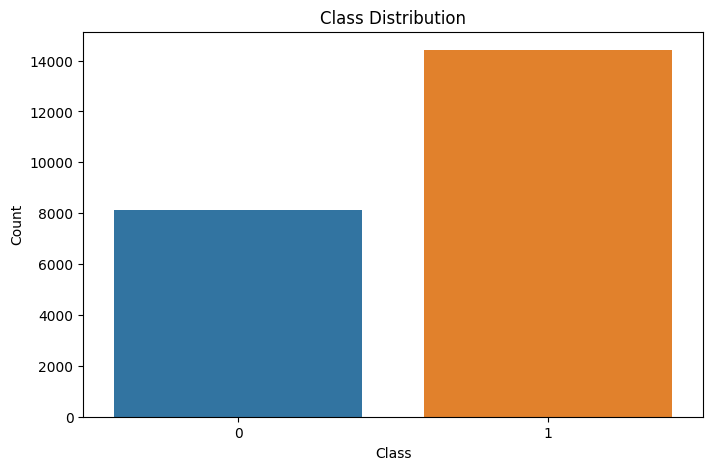

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute class distribution
class_distribution = df.groupBy('target').count().orderBy('target')

# Convert to Pandas DataFrame for visualization
class_distribution_pd = class_distribution.toPandas()

# Visualize class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x='target', y='count', data=class_distribution_pd, hue=["steelblue","orange"], legend=False)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
df.columns

In [ ]:
import pandas as pd

# Assuming df is your DataFrame with the column names you provided
columns = ['index', 'target', 'qid', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '123', '125', '127', '128', '129', '130', '131', '134', '137', '141', '142', '143', '144', '145', '149', '152', '156', '162', '166', '168', '171', '176', '178', '182', '185', '186', '187', '188', '192', '194', '195', '197', '203', '206', '208', '209', '212', '215', '219', '220', '221', '223', '229', '230', '231', '233', '234', '236', '240', '262', '269', '271', '276', '296', '300', '307', '317', '319', '324', '347', '366', '406', '407', '409', '426', '441', '444', '448', '462', '463', '478', '482', '487', '491', '505', '519', '559', '572', '573', '580', '601', '621', '623', '627', '634', '651', '689', '694', '709', '726', '762', '767', '779', '792', '816', '840', '852', '871', '877', '882', '886', '924', '959', '1002', '1016', '1028', '1048', '1112', '1119', '4124', '4125']

# Define the new column names based on the provided mapping
column_names = [
    'Index',
    'label',
    'qid',
    'Motion Distribution Mean', 'Motion Distribution Variance',
    'Frame Difference Distribution Mean', 'Frame Difference Distribution Variance',
    'Short Time Energy Mean', 'Short Time Energy Variance',
    'ZCR Mean', 'ZCR Variance',
    'Spectral Centroid Mean', 'Spectral Centroid Variance',
    'Spectral Roll-off Mean', 'Spectral Roll-off Variance',
    'Spectral Flux Mean', 'Spectral Flux Variance',
    'Fundamental Frequency Mean', 'Fundamental Frequency Variance',
]

# Add column names for Motion Distribution (40 bins)
column_names.extend([f'Motion Distribution Bin {i}' for i in range(1, 41)])

# Add column names for Frame Difference Distribution (32 bins)
column_names.extend([f'Frame Difference Distribution Bin {i}' for i in range(1, 33)])

# Add column names for Text area distribution (15 bins Mean and Variance)
column_names.extend([f'Text Area Distribution Mean Bin {i}' for i in range(1, 16)])
column_names.extend([f'Text Area Distribution Variance Bin {i}' for i in range(1, 16)])

# Add column names for Bag of Audio Words (4000 bins)
column_names.extend([f'Bag of Audio Words Bin {i}' for i in range(1, 109)])  # Adjust the range

# Add column names for Edge change Ratio (Mean and Variance)
column_names.extend(['Edge Change Ratio Mean', 'Edge Change Ratio Variance'])

# Check if the number of columns matches the number of new column names
if len(df.columns) == len(column_names):
    df = df.select(*(col(old_name).alias(new_name) for old_name, new_name in zip(df.columns, column_names)))
    print("Column names have been updated successfully.")
else:
    print("Error: Number of columns in the DataFrame does not match the number of new column names.")
    print("Length of DataFrame columns:", len(df.columns))
    print("Length of new column names:", len(column_names))

print(df.columns)
print(df.columns)


In [ ]:
print("DataFrame columns:")
print(df.columns)
print("Length of DataFrame columns:", len(df.columns))

print("\nNew column names:")
print(column_names)
print("Length of new column names:", len(column_names))

In [16]:
# Drop the 'qid' column
df = df.drop("qid")

<ipython-input-17-e4736ca5fe70>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pd[col], kde=False)


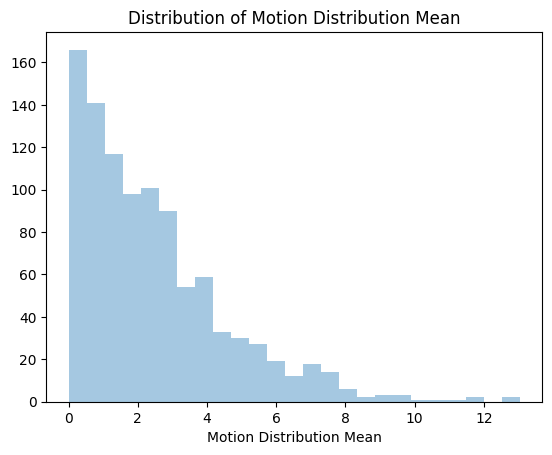

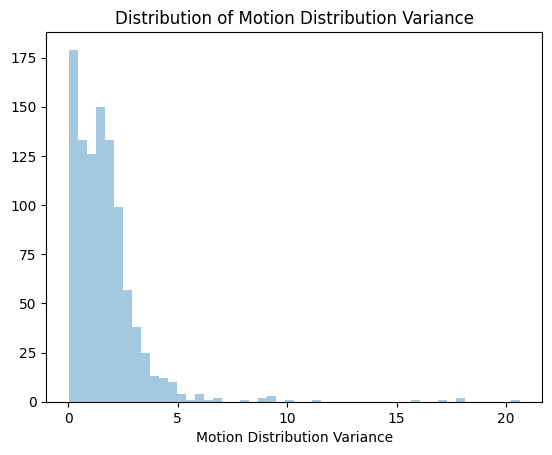

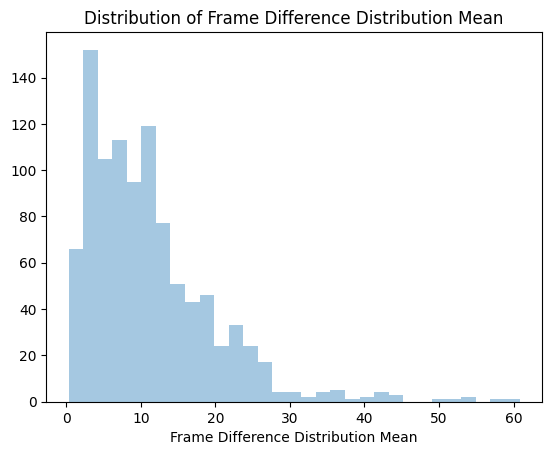

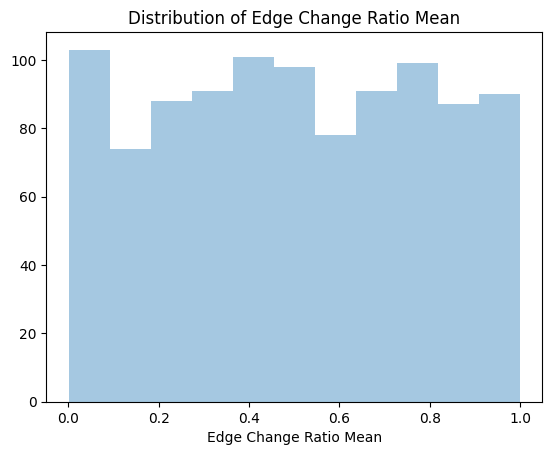

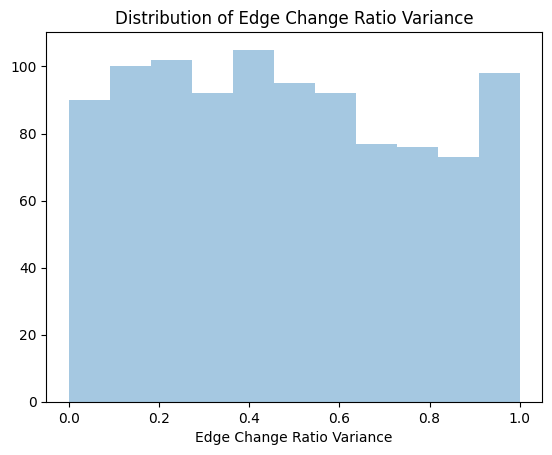

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the DataFrame to a Pandas DataFrame
df_pd = df.limit(1000).toPandas()

cols_to_plot = df_pd.columns[2:5].tolist() + df_pd.columns[-2:].tolist()

for col in cols_to_plot:
    plt.figure()
    sns.distplot(df_pd[col], kde=False)
    plt.title(f'Distribution of {col}')
    plt.show()

+-------+------------------------+----------------------+----------------------+----------------------+-------------------+------------------------+
|summary|Motion Distribution Mean|Spectral Centroid Mean|Spectral Roll-off Mean|Short Time Energy Mean|           ZCR Mean|Bag of Audio Words Bin 1|
+-------+------------------------+----------------------+----------------------+----------------------+-------------------+------------------------+
|  count|                   22545|                 22545|                 22545|                 22545|              22545|                   22545|
|   mean|      2.5948109366156595|    3608.5646795574175|     7080.922259069137|   0.01578854433355513| 0.1069096180971391|    4.121733422044797...|
| stddev|      2.1201272287326645|    238.41388442517885|     395.9734798838856|  0.004585328110054967|0.03205016663958779|    0.003162939323991...|
|    min|                  5.5E-4|             746.46344|                5861.0|                2.3E-5|   

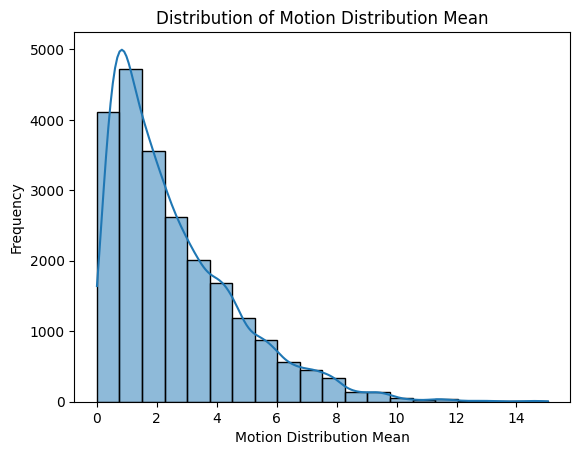

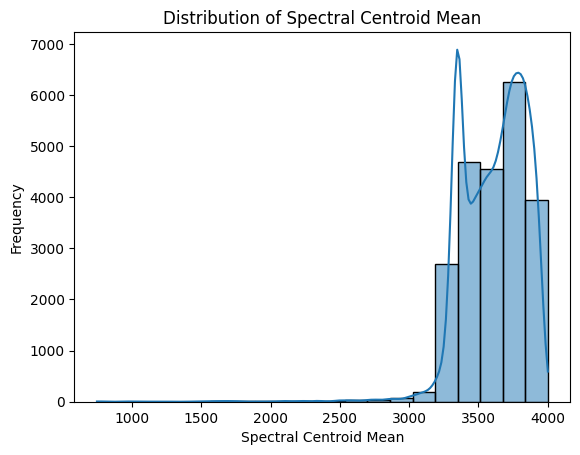

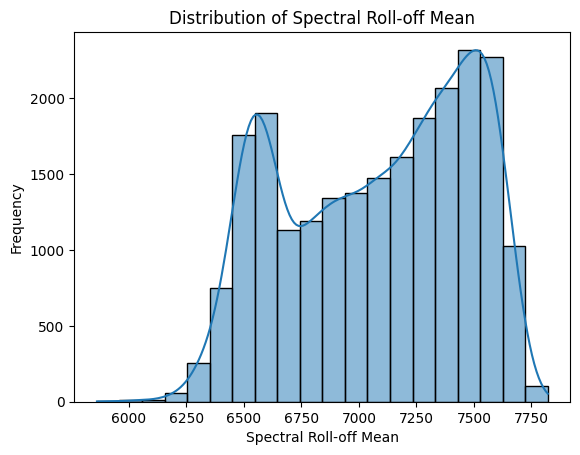

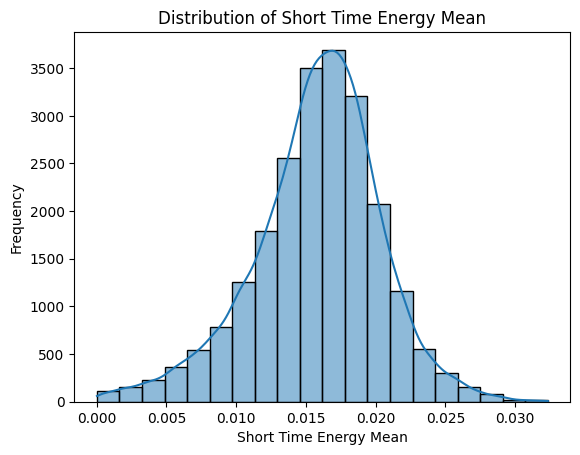

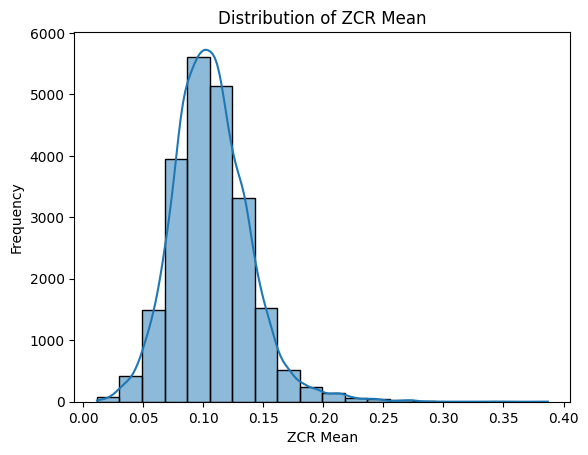

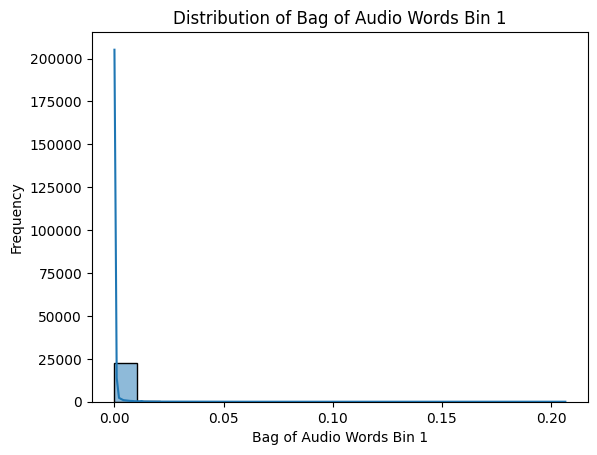

In [27]:
# Define the correct audio features column names based on your DataFrame
audio_features = ["Motion Distribution Mean", "Spectral Centroid Mean", "Spectral Roll-off Mean", "Short Time Energy Mean", "ZCR Mean", "Bag of Audio Words Bin 1"]

# Display summary statistics of numerical columns for audio features
df.select(audio_features).describe().show()

# Visualize distribution of audio features
import matplotlib.pyplot as plt
import seaborn as sns

# Convert DataFrame to Pandas for plotting
audio_df_pd = df.select(audio_features).toPandas()

# Plot histograms for each audio feature
for feature in audio_features:
    plt.figure()
    sns.histplot(audio_df_pd[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [18]:
from pyspark.sql.functions import rand

train, test = df.randomSplit([.8, .2], seed = 42)

print("Training Data Shape:",train.count(), len(train.columns))
print("Test Data Shape:",test.count(), len(test.columns))

Training Data Shape: 18114 230
Test Data Shape: 4431 230


*SVM:*

In [19]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LinearSVC
from pyspark.ml import Pipeline
from pyspark.ml.feature import StandardScaler

# Assemble features into a single vector
assembler = VectorAssembler(inputCols=[col for col in train.columns if col != 'label'], outputCol="features")

# Scale the features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withMean=True, withStd=True)

# Define the SVM model
svm = LinearSVC(maxIter=200, regParam=0.01, labelCol = 'label')

# Create the pipeline
pipeline = Pipeline(stages=[assembler, scaler, svm])

# Fit the pipeline on the training data
model = pipeline.fit(train)

# Make predictions on the validation data
predictions = model.transform(test)

In [20]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Display the structure and some example data from the predictions DataFrame
predictions.select("features", "scaled_features", "prediction").show(5)

# Create an evaluator for both accuracy and F1 Score
evaluator = MulticlassClassificationEvaluator(
    labelCol='label',
    predictionCol='prediction')

# Calculate accuracy
accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
print("Accuracy: {:.2f}".format(accuracy))

# Calculate precision Score
precision_score = evaluator.evaluate(predictions, {evaluator.metricName: "precisionByLabel"})
print("Precision Score: {:.2f}".format(precision_score))

# Calculate recall Score
recall_score = evaluator.evaluate(predictions, {evaluator.metricName: "recallByLabel"})
print("Recall Score: {:.2f}".format(recall_score))

# Calculate F1 Score
f1_score = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
print("F1 Score: {:.2f}".format(f1_score))


+--------------------+--------------------+----------+
|            features|     scaled_features|prediction|
+--------------------+--------------------+----------+
|(229,[0,1,2,3,4,5...|[-0.3280484346320...|       0.0|
|(229,[0,1,2,3,4,5...|[-0.3280484346320...|       1.0|
|(229,[0,1,2,3,4,5...|[-0.3280484346320...|       0.0|
|(229,[0,1,2,3,4,5...|[-0.3280484346320...|       0.0|
|(229,[0,1,2,3,4,5...|[-0.3280484346320...|       0.0|
+--------------------+--------------------+----------+
only showing top 5 rows

Accuracy: 0.91
Precision Score: 0.89
Recall Score: 0.86
F1 Score: 0.91


In [ ]:
# Assuming your SVM model is the last stage in your pipeline and your pipeline model is named 'pipeline_model'
svm_model = model.stages[-1]  # Assuming SVM is the last stage, adjust this if necessary
coefficients = svm_model.coefficients.toArray()
print("Coefficients:")
print(coefficients)

In [22]:
# Print top 10 feature names and their coefficients
# Zip feature names with their coefficients
feature_coefficients = zip(column_names[3:], coefficients)

# Sort feature coefficients by absolute value in descending order
sorted_feature_coefficients = sorted(feature_coefficients, key=lambda x: abs(x[1]), reverse=True)

# Retrieve the top N most informative features
top_n = 10  # Adjust this value
top_features = sorted_feature_coefficients[:top_n]

# Print the top N most informative features along with their coefficients
for feature, coefficient in top_features:
    print(f"Feature: {feature}, Coefficient: {coefficient}")

Feature: Frame Difference Distribution Bin 31, Coefficient: 57951.35538080626
Feature: Bag of Audio Words Bin 66, Coefficient: 145.76831325226317
Feature: Bag of Audio Words Bin 4, Coefficient: -138.79523155262567
Feature: Bag of Audio Words Bin 33, Coefficient: 122.18947355529674
Feature: ZCR Mean, Coefficient: -120.46642755777862
Feature: Bag of Audio Words Bin 10, Coefficient: 119.0009141740513
Feature: Frame Difference Distribution Bin 1, Coefficient: 108.50988879554993
Feature: Bag of Audio Words Bin 87, Coefficient: 98.64655293141905
Feature: Bag of Audio Words Bin 59, Coefficient: 64.39112083535095
Feature: Frame Difference Distribution Bin 25, Coefficient: -57.9277677041693


In [23]:
# Hyperparameter tuning w/ Grid Search
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define a grid of hyperparameters
param_grid = ParamGridBuilder() \
    .addGrid(svm.maxIter, [100, 200, 300]) \
    .addGrid(svm.regParam, [0.01, 0.1, 1.0]) \
    .build()

# Define cross-validation
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=param_grid,
                          evaluator=MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy'),
                          numFolds=5)

# Fit the cross-validated model
cv_model = crossval.fit(train)

# Get the best model from cross-validation
best_model = cv_model.bestModel

# Make predictions on the test data
predictions = best_model.transform(test)

# Evaluate the best model
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)

print("Best Model Accuracy:", accuracy)

Best Model Accuracy: 0.9128864816068607


In [24]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator

from pyspark.ml.classification import LinearSVC
from pyspark.ml import Pipeline
from pyspark.ml.feature import StandardScaler

# Define the SVM model
svm = LinearSVC(maxIter=200, labelCol='label')

# Assemble features into a single vector
assembler = VectorAssembler(inputCols=[col for col in train.columns if col != 'label'], outputCol="features")

# Scale the features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withMean=True, withStd=True)

# Create the pipeline
pipeline = Pipeline(stages=[assembler, scaler, svm])

# Define the parameter grid
paramGrid = ParamGridBuilder() \
    .addGrid(svm.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(svm.maxIter, [100, 200, 300]) \
    .build()

# Define the evaluator
evaluator = BinaryClassificationEvaluator(labelCol='label')

# Define the cross-validator
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3)

# Fit the cross-validator to the training data
cvModel = crossval.fit(train)

# Make predictions on the test data
predictions = cvModel.transform(test)

# Define the evaluator
evaluator = BinaryClassificationEvaluator(labelCol='label')

# Calculate area under ROC curve
auc = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
print("Area under ROC: {:.2f}".format(auc))

# Calculate area under precision-recall curve
pr_auc = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"})
print("Area under PR curve: {:.2f}".format(pr_auc))

Area under ROC: 0.96
Area under PR curve: 0.97


*Logistic Regression:*



In [25]:
from pyspark.ml.classification import LogisticRegression

# Assemble features into a single vector
assembler = VectorAssembler(inputCols=[col for col in df.columns if col != 'label'], outputCol="features")

# Scale the features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withMean=True, withStd=True)

# Define the logistic regression model
lr = LogisticRegression(labelCol='label', featuresCol='scaled_features')

# Create the pipeline
pipeline = Pipeline(stages=[assembler, scaler, lr])

# Split data into train and test sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Train the model
model = pipeline.fit(train_data)

# Make predictions on test data
predictions = model.transform(test_data)


In [26]:
# Evaluate Logistic Regression model
evaluator = BinaryClassificationEvaluator(labelCol='label')
areaUnderROC = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
print(f"Area Under ROC: {areaUnderROC}")

areaUnderPR = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"})
print(f"Area Under PR: {areaUnderPR}")

Area Under ROC: 0.9615801467996484
Area Under PR: 0.9757049221256221


*Naive Bayes:*

In [29]:
from pyspark.ml.classification import NaiveBayes

nb = NaiveBayes(smoothing=1.0, modelType="multinomial")

pipeline4 = Pipeline(stages=[assembler, scaler, nb])

# Fit the pipeline on the training data
model4 = pipeline4.fit(train)

# Make predictions on the validation data
predictions = model4.transform(test)

evaluator = BinaryClassificationEvaluator(labelCol='label')
areaUnderROC = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
print(f"Area Under ROC: {areaUnderROC}")

areaUnderPR = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"})
print(f"Area Under PR: {areaUnderPR}")

Area Under ROC: 0.6115096510460197
Area Under PR: 0.7236282753736603


*Random Forest Classifier:*

In [30]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol="features", labelCol="label")

pipeline3 = Pipeline(stages=[assembler, scaler, rf])

# Fit the pipeline on the training data
model3 = pipeline3.fit(train)

# Make predictions on the validation data
predictions3 = model3.transform(test)

evaluator = BinaryClassificationEvaluator(labelCol='label')
areaUnderROC = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
print(f"Area Under ROC: {areaUnderROC}")

areaUnderPR = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"})
print(f"Area Under PR: {areaUnderPR}")

Area Under ROC: 0.6115174100126141
Area Under PR: 0.7236277919398901
